In [16]:
#importlibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [17]:
!ls

CONTRIBUTING.md
LICENSE.md
Phase 2 Project (3).ipynb
Phase 2 Project.ipynb
README.md
data
halfway-there.gif


In [18]:
data = pd.read_csv('data/kc_house_data.csv')
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [20]:
print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [21]:
data = data.drop(columns=['id', 'date', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'])
data.describe()

price   sqft_living      sqft_lot       zipcode           lat  \
count  2.159700e+04  21597.000000  2.159700e+04  21597.000000  21597.000000   
mean   5.402966e+05   2080.321850  1.509941e+04  98077.951845     47.560093   
std    3.673681e+05    918.106125  4.141264e+04     53.513072      0.138552   
min    7.800000e+04    370.000000  5.200000e+02  98001.000000     47.155900   
25%    3.220000e+05   1430.000000  5.040000e+03  98033.000000     47.471100   
50%    4.500000e+05   1910.000000  7.618000e+03  98065.000000     47.571800   
75%    6.450000e+05   2550.000000  1.068500e+04  98118.000000     47.678000   
max    7.700000e+06  13540.000000  1.651359e+06  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21597.000000   21597.000000   21597.000000  
mean    -122.213982    1986.620318   12758.283512  
std        0.140724     685.230472   27274.441950  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.231000    1840.000000    7620.000000  
75%     -122.125000    2360.000000   10083.000000  
max     -121.315000    6210.000000  871200.000000

In [22]:
data['sqft_lawn'] = data['sqft_lot'].subtract(data['sqft_living'])
data['sqft_lawn15'] = data['sqft_lot15'].subtract(data['sqft_living15'])
data.describe()

price   sqft_living      sqft_lot       zipcode           lat  \
count  2.159700e+04  21597.000000  2.159700e+04  21597.000000  21597.000000   
mean   5.402966e+05   2080.321850  1.509941e+04  98077.951845     47.560093   
std    3.673681e+05    918.106125  4.141264e+04     53.513072      0.138552   
min    7.800000e+04    370.000000  5.200000e+02  98001.000000     47.155900   
25%    3.220000e+05   1430.000000  5.040000e+03  98033.000000     47.471100   
50%    4.500000e+05   1910.000000  7.618000e+03  98065.000000     47.571800   
75%    6.450000e+05   2550.000000  1.068500e+04  98118.000000     47.678000   
max    7.700000e+06  13540.000000  1.651359e+06  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15     sqft_lawn    sqft_lawn15  
count  21597.000000   21597.000000   21597.000000  2.159700e+04   21597.000000  
mean    -122.213982    1986.620318   12758.283512  1.301909e+04   10771.663194  
std        0.140724     685.230472   27274.441950  4.126330e+04   27157.046737  
min     -122.519000     399.000000     651.000000 -1.900000e+03   -1363.000000  
25%     -122.328000    1490.000000    5100.000000  3.095000e+03    3234.000000  
50%     -122.231000    1840.000000    7620.000000  5.710000e+03    5787.000000  
75%     -122.125000    2360.000000   10083.000000  8.662000e+03    8140.000000  
max     -121.315000    6210.000000  871200.000000  1.650059e+06  867780.000000

In [23]:
data['sqft_lawn_prct'] = data['sqft_lawn']/data['sqft_lot']
data['sqft_lawn_prct15'] = data['sqft_lawn15']/data['sqft_lot15']
data.head()

price  sqft_living  sqft_lot  zipcode      lat     long  sqft_living15  \
0  221900.0         1180      5650    98178  47.5112 -122.257           1340   
1  538000.0         2570      7242    98125  47.7210 -122.319           1690   
2  180000.0          770     10000    98028  47.7379 -122.233           2720   
3  604000.0         1960      5000    98136  47.5208 -122.393           1360   
4  510000.0         1680      8080    98074  47.6168 -122.045           1800   

   sqft_lot15  sqft_lawn  sqft_lawn15  sqft_lawn_prct  sqft_lawn_prct15  
0        5650       4470         4310        0.791150          0.762832  
1        7639       4672         5949        0.645126          0.778767  
2        8062       9230         5342        0.923000          0.662615  
3        5000       3040         3640        0.608000          0.728000  
4        7503       6400         5703        0.792079          0.760096

In [41]:
data = data[['price', 'sqft_living', 'sqft_lot', 'sqft_lawn', 'sqft_lawn_prct', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15',  'sqft_lawn15',
        'sqft_lawn_prct15']]
data.head()

price  sqft_living  sqft_lot  sqft_lawn  sqft_lawn_prct  zipcode  \
0  221900.0         1180      5650       4470        0.791150       66   
1  538000.0         2570      7242       4672        0.645126       55   
2  180000.0          770     10000       9230        0.923000       16   
3  604000.0         1960      5000       3040        0.608000       58   
4  510000.0         1680      8080       6400        0.792079       37   

       lat     long  sqft_living15  sqft_lot15  sqft_lawn15  sqft_lawn_prct15  
0  47.5112  122.257           1340        5650         4310          0.762832  
1  47.7210  122.319           1690        7639         5949          0.778767  
2  47.7379  122.233           2720        8062         5342          0.662615  
3  47.5208  122.393           1360        5000         3640          0.728000  
4  47.6168  122.045           1800        7503         5703          0.760096

In [42]:
data['long'] = data['long'].abs()
data.head()

price  sqft_living  sqft_lot  sqft_lawn  sqft_lawn_prct  zipcode  \
0  221900.0         1180      5650       4470        0.791150       66   
1  538000.0         2570      7242       4672        0.645126       55   
2  180000.0          770     10000       9230        0.923000       16   
3  604000.0         1960      5000       3040        0.608000       58   
4  510000.0         1680      8080       6400        0.792079       37   

       lat     long  sqft_living15  sqft_lot15  sqft_lawn15  sqft_lawn_prct15  
0  47.5112  122.257           1340        5650         4310          0.762832  
1  47.7210  122.319           1690        7639         5949          0.778767  
2  47.7379  122.233           2720        8062         5342          0.662615  
3  47.5208  122.393           1360        5000         3640          0.728000  
4  47.6168  122.045           1800        7503         5703          0.760096

In [43]:
# 8b = 1, 8a = 2, 7b = 3, 7a = 4

x = data['long'].tolist()
res = ["1" if i > 122.2 
       else "2" if i > 122.0 
       else "3" if i > 121.6
       else "4"for i in x]
data['zone'] = res
data.head()

price  sqft_living  sqft_lot  sqft_lawn  sqft_lawn_prct  zipcode  \
0  221900.0         1180      5650       4470        0.791150       66   
1  538000.0         2570      7242       4672        0.645126       55   
2  180000.0          770     10000       9230        0.923000       16   
3  604000.0         1960      5000       3040        0.608000       58   
4  510000.0         1680      8080       6400        0.792079       37   

       lat     long  sqft_living15  sqft_lot15  sqft_lawn15  sqft_lawn_prct15  \
0  47.5112  122.257           1340        5650         4310          0.762832   
1  47.7210  122.319           1690        7639         5949          0.778767   
2  47.7379  122.233           2720        8062         5342          0.662615   
3  47.5208  122.393           1360        5000         3640          0.728000   
4  47.6168  122.045           1800        7503         5703          0.760096   

  zone  
0    1  
1    1  
2    1  
3    1  
4    2

def group_zone(long_list):
    if long_list[0] < -122.2:
        return '8b'
    elif long_list[0] < -122.0 and long_list[0] > -121.6:
        return '8a'
    elif long_list[0] < -121.6 and long_list[0] > -121.4:
        return '7b'
    else: 
        return '7a'
    
data.apply(lambda row: group_zone(row), axis=1)
data['zone'] = data.apply(lambda row: group_zone(row), axis=1)
data.head()

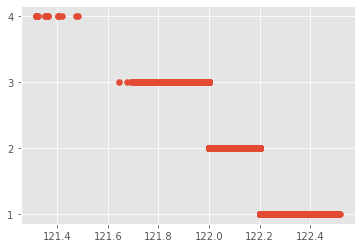

In [44]:
X = data['long']
Y = data['zone']

plt.scatter(X,Y)

In [45]:
# create colormap
cm = sns.light_palette("purple", as_cmap=True)

# create a dataframe with the first 10 rows
# of original DataFrame
data_top = data.head(10)

# view DataFrame
data_top.style.background_gradient(cmap=cm)

In [46]:
# check info on columns/data size
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21597 non-null  float64
 1   sqft_living       21597 non-null  int64  
 2   sqft_lot          21597 non-null  int64  
 3   sqft_lawn         21597 non-null  int64  
 4   sqft_lawn_prct    21597 non-null  float64
 5   zipcode           21597 non-null  int64  
 6   lat               21597 non-null  float64
 7   long              21597 non-null  float64
 8   sqft_living15     21597 non-null  int64  
 9   sqft_lot15        21597 non-null  int64  
 10  sqft_lawn15       21597 non-null  int64  
 11  sqft_lawn_prct15  21597 non-null  float64
 12  zone              21597 non-null  object 
dtypes: float64(5), int64(7), object(1)
memory usage: 2.1+ MB


In [47]:
# check descriptive statistics
data.describe()

price   sqft_living      sqft_lot     sqft_lawn  sqft_lawn_prct  \
count  2.159700e+04  21597.000000  2.159700e+04  2.159700e+04    21597.000000   
mean   5.402966e+05   2080.321850  1.509941e+04  1.301909e+04        0.676245   
std    3.673681e+05    918.106125  4.141264e+04  4.126330e+04        0.268460   
min    7.800000e+04    370.000000  5.200000e+02 -1.900000e+03       -3.653846   
25%    3.220000e+05   1430.000000  5.040000e+03  3.095000e+03        0.592391   
50%    4.500000e+05   1910.000000  7.618000e+03  5.710000e+03        0.752334   
75%    6.450000e+05   2550.000000  1.068500e+04  8.662000e+03        0.843337   
max    7.700000e+06  13540.000000  1.651359e+06  1.650059e+06        0.999390   

            zipcode           lat          long  sqft_living15     sqft_lot15  \
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000   
mean      35.150484     47.560093    122.213982    1986.620318   12758.283512   
std       19.248972      0.138552      0.140724     685.230472   27274.441950   
min        0.000000     47.155900    121.315000     399.000000     651.000000   
25%       21.000000     47.471100    122.125000    1490.000000    5100.000000   
50%       34.000000     47.571800    122.231000    1840.000000    7620.000000   
75%       52.000000     47.678000    122.328000    2360.000000   10083.000000   
max       69.000000     47.777600    122.519000    6210.000000  871200.000000   

         sqft_lawn15  sqft_lawn_prct15  
count   21597.000000      21597.000000  
mean    10771.663194          0.692336  
std     27157.046737          0.226631  
min     -1363.000000         -1.241814  
25%      3234.000000          0.623625  
50%      5787.000000          0.753731  
75%      8140.000000          0.826190  
max    867780.000000          0.998551

In [48]:
# Label Encode object variables
from sklearn.preprocessing import LabelEncoder

# instantiate a label encoder
le = LabelEncoder()

# fit the label encoder to the sex variable
# while dropping any duplicates
le.fit(data['zipcode'].drop_duplicates()) 

# create new sex variable with label encoded values
data['zipcode'] = le.transform(data['zipcode'])

# fit the label encoder to the smoker variable
# while dropping any duplicates
le.fit(data['zone'].drop_duplicates()) 

# create new smoker variable with label encoded values
data['zone'] = le.transform(data['zone'])

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21597 non-null  float64
 1   sqft_living       21597 non-null  int64  
 2   sqft_lot          21597 non-null  int64  
 3   sqft_lawn         21597 non-null  int64  
 4   sqft_lawn_prct    21597 non-null  float64
 5   zipcode           21597 non-null  int64  
 6   lat               21597 non-null  float64
 7   long              21597 non-null  float64
 8   sqft_living15     21597 non-null  int64  
 9   sqft_lot15        21597 non-null  int64  
 10  sqft_lawn15       21597 non-null  int64  
 11  sqft_lawn_prct15  21597 non-null  float64
 12  zone              21597 non-null  int32  
dtypes: float64(5), int32(1), int64(7)
memory usage: 2.1 MB


In [49]:
# import statsmodels library
import statsmodels.api as sm

# create predictors
predictors = data.drop(['price'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(data['price'],predictors_int).fit()

In [50]:
# view model coefficients
model.params

const              -5.032157e+07
sqft_living        -1.270880e+13
sqft_lot            1.270880e+13
sqft_lawn          -1.270880e+13
sqft_lawn_prct      1.309852e+04
zipcode            -1.282448e+03
lat                 6.924990e+05
long                1.422001e+05
sqft_living15      -7.317491e+12
sqft_lot15          7.317491e+12
sqft_lawn15        -7.317491e+12
sqft_lawn_prct15   -6.531638e+04
zone               -7.849205e+04
dtype: float64

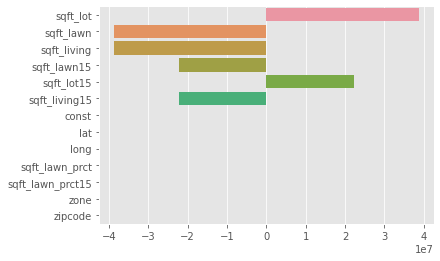

In [114]:
coeff = model.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h');

In [35]:
# view results of model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     3205.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:52:15   Log-Likelihood:            -2.9756e+05
No. Observations:               21597   AIC:                         5.951e+05
Df Residuals:                   21586   BIC:                         5.952e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.039e+07   3.35e+06    -15.051      0.000    -5.7e+07   -4.38e+07
sqft_living      -1.422e+13   1.03e+13     -1.374      0.169   -3.45e+13    6.06e+12
sqft_lot          1.422e+13   1.03e+13      1.374      0.169   -6.06e+12    3.45e+13
sqft_lawn_prct    1.312e+04   1.23e+04      1.063      0.288   -1.11e+04    3.73e+04
zipcode          -1283.3890    101.608    -12.631      0.000   -1482.548   -1084.230
lat               6.923e+05   1.22e+04     56.665      0.000    6.68e+05    7.16e+05
long              1.428e+05   2.69e+04      5.303      0.000       9e+04    1.96e+05
sqft_living15    -6.183e+12    4.5e+12     -1.374      0.169    -1.5e+13    2.64e+12
sqft_lot15        6.183e+12    4.5e+12      1.374      0.169   -2.64e+12     1.5e+13
sqft_lawn        -1.422e+13   1.03e+13     -1.374      0.169   -3.45e+13    6.06e+12
sqft_lawn15      -6.183e+12    4.5e+12     -1.374      0.169    -1.5e+13    2.64e+12
sqft_lawn_prct15 -6.532e+04   1.44e+04     -4.524      0.000   -9.36e+04    -3.7e+04
zone             -7.849e+04   5874.783    -13.361      0.000      -9e+04    -6.7e+04
==============================================================================
Omnibus:                    17600.144   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1211302.323
Skew:                           3.455   Prob(JB):                         0.00
Kurtosis:                      39.033   Cond. No.                     3.36e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.53e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
# percentage of variance in the y variable explained by the x variable
model.rsquared

0.5975789460515297

In [38]:
# display adjusted r-squared
model.rsquared_adj

0.5973925191758007

In [39]:
# f-statistic to compare p-value
model.fvalue

3205.433464005606

In [52]:
# p-value for the liklihood our model 
# fits the data better than the mean
model.f_pvalue

0.0

In [51]:
# view dimensions of the DataFrame
data.shape

(21597, 13)

In [53]:
# return the standard error for 
# all coefficients in the equation
model.bse

const               3.349003e+06
sqft_living         9.300422e+12
sqft_lot            9.300422e+12
sqft_lawn           9.300422e+12
sqft_lawn_prct      1.234957e+04
zipcode             1.016235e+02
lat                 1.222088e+04
long                2.694034e+04
sqft_living15       5.355011e+12
sqft_lot15          5.355011e+12
sqft_lawn15         5.355011e+12
sqft_lawn_prct15    1.444286e+04
zone                5.875901e+03
dtype: float64

In [54]:
# display t-value for hours variable
model.tvalues[1]

-1.3664754117399491

In [55]:
# check t-statistic probability score for constant
model.pvalues[0]

8.984314404035416e-51

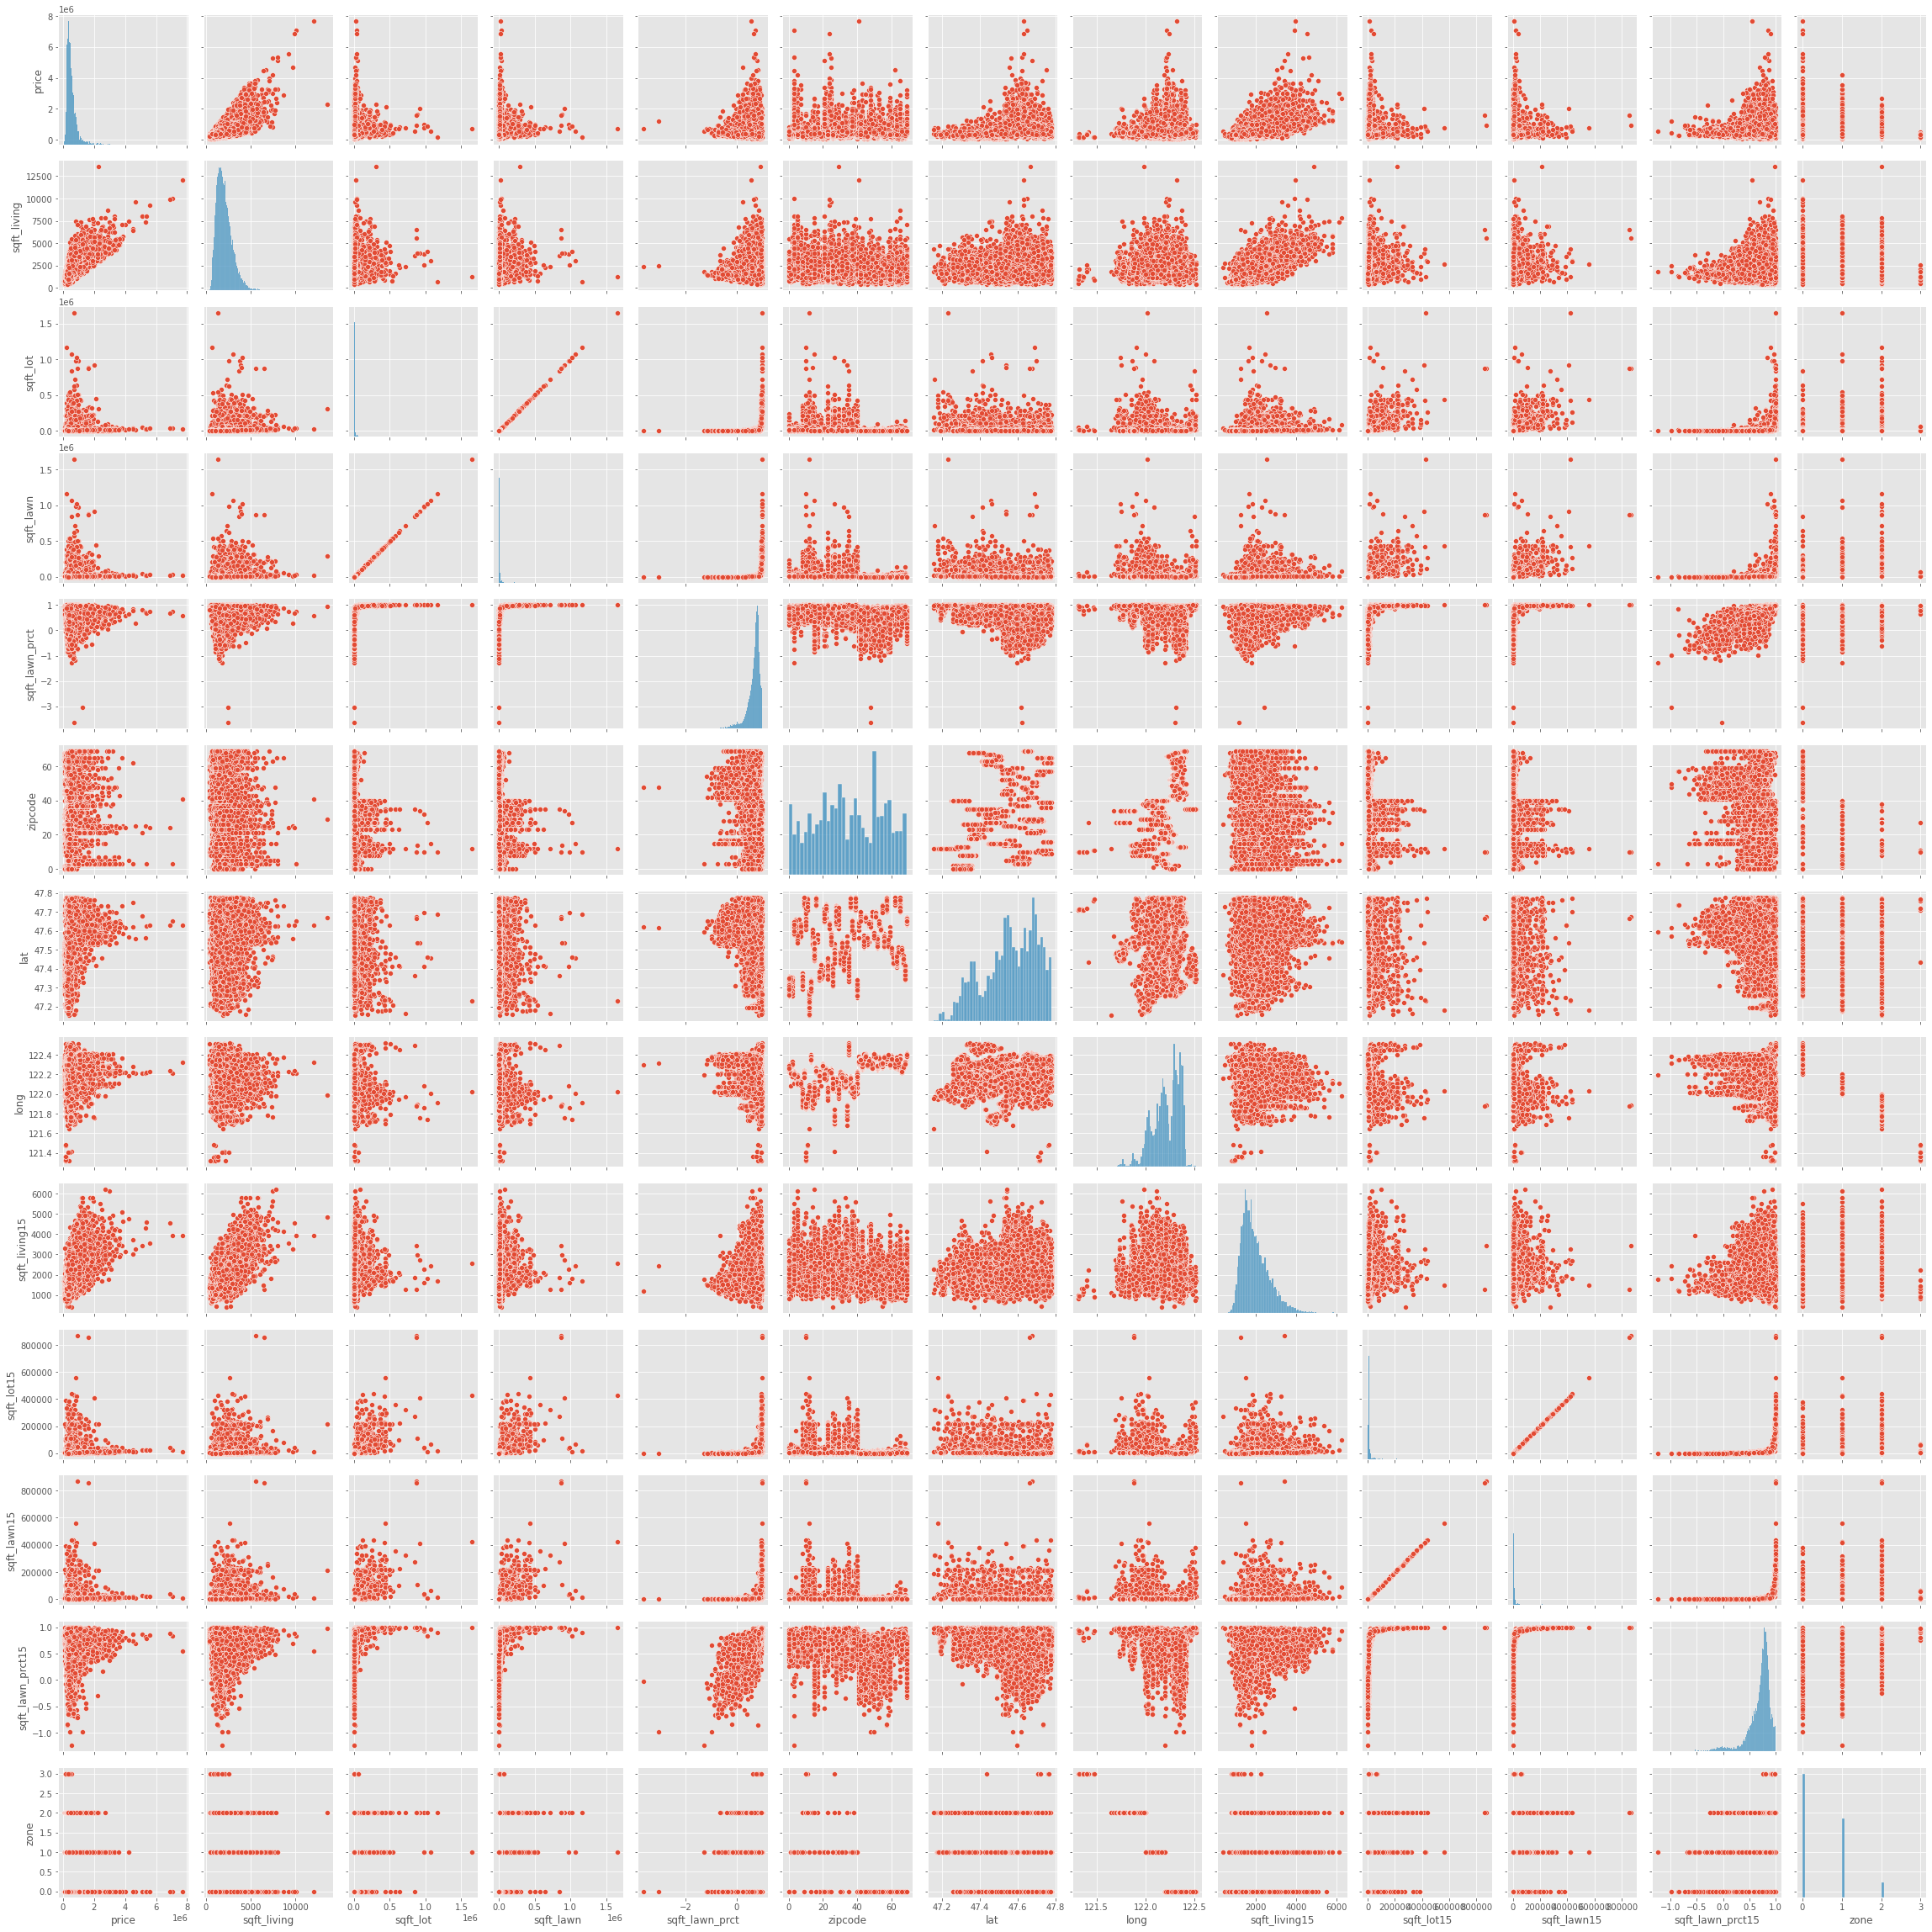

In [57]:
# view scatter plots and distribution plots for variables
sns.pairplot(data)

In [60]:
# return residuals from model
residuals = model.resid

# view residuals
residuals

0        -15950.581884
1       -225349.765583
2       -307272.401885
3        143490.327099
4        111194.770358
             ...      
21592   -185361.725514
21593   -168892.864065
21594    148023.210958
21595     30924.317808
21596     57771.296756
Length: 21597, dtype: float64

In [61]:
# return predicted values from model
y_pred = model.fittedvalues

# view predicted values
y_pred

0        237850.581884
1        763349.765583
2        487272.401885
3        460509.672901
4        398805.229642
             ...      
21592    545361.725514
21593    568892.864065
21594    254077.789042
21595    369075.682192
21596    267228.703244
Length: 21597, dtype: float64

In [64]:
# true y value
y = data["price"]

In [65]:
# return mean absolute error of model
mae_resid = np.mean(np.abs(y - y_pred))

# view residuals from model
mae_resid

148166.7811428736

In [66]:
# return Mean Squared Error of model
mse_resid = model.mse_resid

# view Mean Squared Error
mse_resid

54356387193.127075

In [67]:
# return Root Mean Squared Error
rmse_residuals = np.sqrt(model.mse_resid)

# view Root Mean Squared Error
rmse_residuals

233144.56286417463

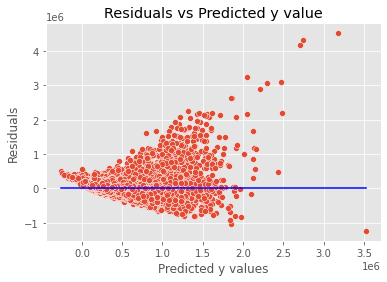

In [68]:
# plot the residuals against predicted values to 
# check for homoscedasticity
p = sns.scatterplot(y_pred, residuals)
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')
#plt.xlim(70,100)
p = sns.lineplot([y_pred.min(),y_pred.max()],[0,0],color='blue')
p = plt.title('Residuals vs Predicted y value')

In [69]:
# run Goldfeld Quandt Test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']


test = sms.het_goldfeldquandt(residuals, predictors_int)
lzip(name, test)

[('F statistic', 0.8865253541821283), ('p-value', 0.9999999997985135)]

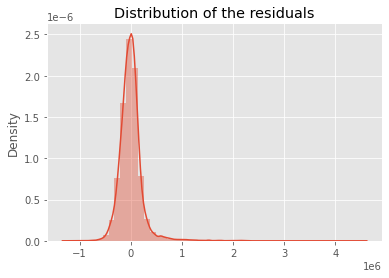

In [70]:
# check for normality among the residuals
p = sns.distplot(residuals,kde=True)
p = plt.title('Distribution of the residuals')

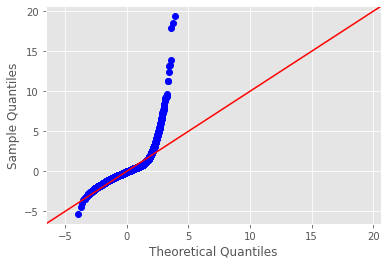

In [74]:
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

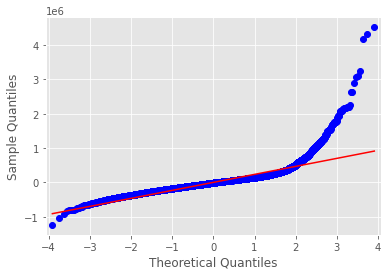

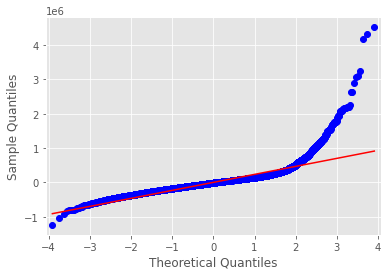

In [75]:
# create a Q-Q plot of the residuals
sm.qqplot(residuals, line ='s')

In [78]:
# create non normal variables list
non_normal = ['price']

# use for loop to apply log transform on variable
for feat in non_normal:
    data[feat] = data[feat].map(lambda x: np.log(x))

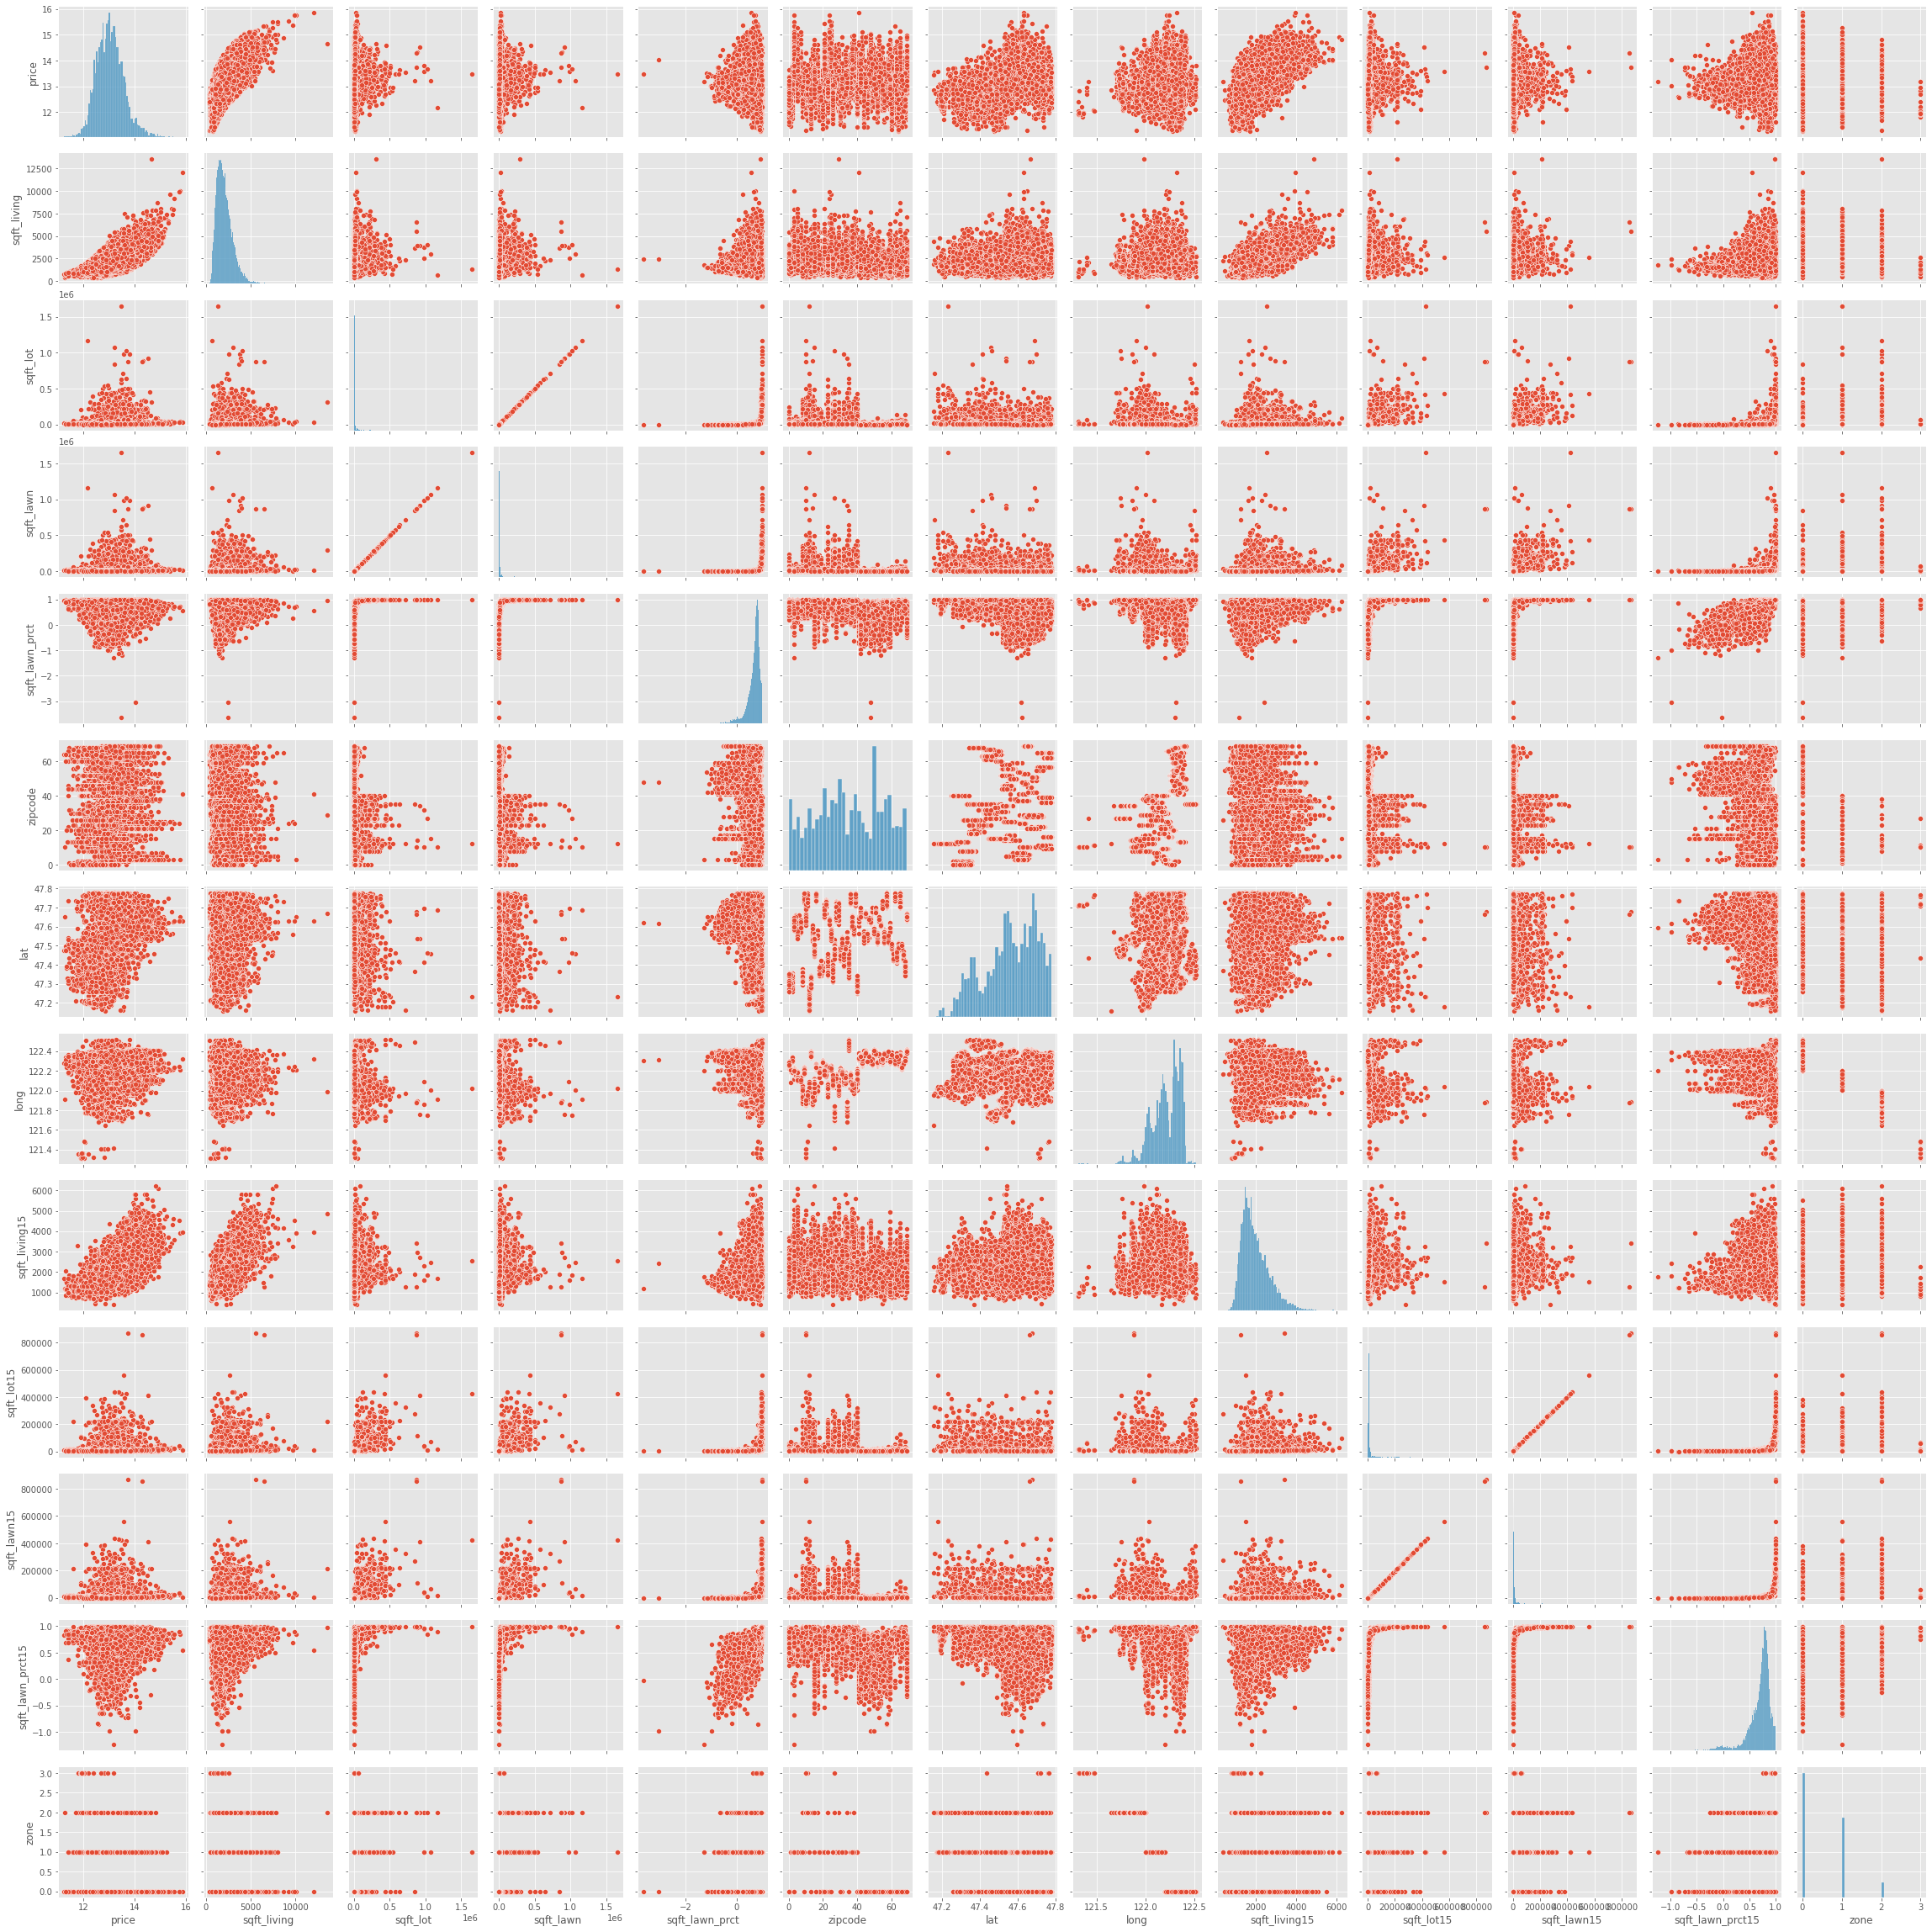

In [80]:
# view new distribution of data
sns.pairplot(data)

In [83]:
# create predictors
predictors = data.drop(['price'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(data['price'],predictors_int).fit()

In [84]:
# view model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     4843.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:29:49   Log-Likelihood:                -4084.9
No. Observations:               21597   AIC:                             8192.
Df Residuals:                   21586   BIC:                             8280.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -113.8361      4.201    -27.100      0.000    -122.069    -105.603
sqft_living       -3.87e+07   1.17e+07     -3.317      0.001   -6.16e+07   -1.58e+07
sqft_lot           3.87e+07   1.17e+07      3.317      0.001    1.58e+07    6.16e+07
sqft_lawn         -3.87e+07   1.17e+07     -3.317      0.001   -6.16e+07   -1.58e+07
sqft_lawn_prct      -0.1422      0.015     -9.181      0.000      -0.173      -0.112
zipcode             -0.0015      0.000    -11.855      0.000      -0.002      -0.001
lat                  1.5234      0.015     99.384      0.000       1.493       1.553
long                 0.4389      0.034     12.990      0.000       0.373       0.505
sqft_living15    -2.228e+07   6.72e+06     -3.317      0.001   -3.54e+07   -9.12e+06
sqft_lot15        2.228e+07   6.72e+06      3.317      0.001    9.12e+06    3.54e+07
sqft_lawn15      -2.228e+07   6.72e+06     -3.317      0.001   -3.54e+07   -9.12e+06
sqft_lawn_prct15    -0.0581      0.018     -3.206      0.001      -0.094      -0.023
zone                -0.0019      0.007     -0.252      0.801      -0.016       0.013
==============================================================================
Omnibus:                      317.963   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.663
Skew:                           0.062   Prob(JB):                    9.04e-129
Kurtosis:                       3.800   Cond. No.                     2.99e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.2e-17. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [85]:
# calculate percent change in dependent variable
# based on independent variable
np.exp(model.bse[1] - 1) * 100

inf

<AxesSubplot:>

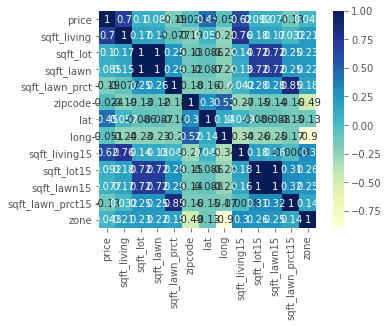

In [86]:
# heatmap of correlation between hours and score
sns.heatmap(data.corr(), annot=True,cmap='YlGnBu',square=True)

In [87]:
# import train_test_split from sci-kit learn
from sklearn.model_selection import train_test_split

In [88]:
# Create our X and y
y = data['price']
X = data.drop(['price'], axis=1)

In [89]:
print(len(X))
print(len(y))

21597
21597


In [90]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# print length
print(len(X_train), len(y_train), len(X_test), len(y_test))

17277 17277 4320 4320


In [91]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Create linear regression object
linreg = LinearRegression()

# Fit lr object to training data
linreg.fit(X_train, y_train)

LinearRegression()

In [92]:

# make predictions on training and testing data
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [93]:
# view predictions array on test data
y_hat_train

array([13.50592504, 12.41649958, 12.44372635, ..., 12.58060951,
       12.96696912, 13.28276489])

In [94]:
# view model intercept
print('\nModel Intercept:', linreg.intercept_)


Model Intercept: -113.63830316363214


In [95]:
# view model coefficients
print('Model Slope:' ,linreg.coef_)

Model Slope: [ 1.86907726e-04  9.38190286e-05 -9.30886960e-05 -1.48918631e-01
 -1.49769942e-03  1.52648439e+00  4.36146682e-01  1.28588422e-04
  6.42772743e-05 -6.43111514e-05 -5.70640700e-02  1.08439024e-03]


In [96]:
# check DataFrame columns
data.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_lawn', 'sqft_lawn_prct',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_lawn15',
       'sqft_lawn_prct15', 'zone'],
      dtype='object')

In [97]:
# view info for first instance
X_train.iloc[0]

sqft_living          3786.000000
sqft_lot            38038.000000
sqft_lawn           34252.000000
sqft_lawn_prct          0.900468
zipcode                35.000000
lat                    47.390700
long                  122.448000
sqft_living15        2850.000000
sqft_lot15          33361.000000
sqft_lawn15         30511.000000
sqft_lawn_prct15        0.914571
zone                    0.000000
Name: 3930, dtype: float64

In [98]:
# create list of values for first instance
ph_1_values = list(X_train.iloc[0])

# view values
ph_1_values

[3786.0,
 38038.0,
 34252.0,
 0.9004679530995321,
 35.0,
 47.3907,
 122.448,
 2850.0,
 33361.0,
 30511.0,
 0.9145709061478973,
 0.0]

In [99]:
# create list of coefficients
slopes = list(linreg.coef_)

# view list of coefficients
slopes

[0.0001869077258696091,
 9.38190285526804e-05,
 -9.308869596281998e-05,
 -0.1489186306677288,
 -0.0014976994216664367,
 1.5264843928143084,
 0.43614668189785916,
 0.000128588421858664,
 6.427727434410692e-05,
 -6.431115142735968e-05,
 -0.05706406999362779,
 0.001084390240291194]

In [100]:
# view p-values for each variable
y_hat_index1 = [slopes[i] * ph_1_values[i] for i in range(len(slopes))]
y_hat_index1

[0.70763265014234,
 3.5686882080868574,
 -3.18847401411851,
 -0.13409645453575497,
 -0.05241947975832528,
 72.34116391454505,
 53.40528890502905,
 0.36647700229719243,
 2.144354149393751,
 -1.962197541200171,
 -0.0521891382025592,
 0.0]

In [101]:
# make prediction
y_hat_index1 = np.sum(y_hat_index1) + float(linreg.intercept_)
y_hat_index1

13.505925038046783

In [102]:
# check length of y_hat
y_hat_index1 == y_hat_train[0]

True

In [103]:
# view predictions array on test data
y_hat_train

array([13.50592504, 12.41649958, 12.44372635, ..., 12.58060951,
       12.96696912, 13.28276489])

In [104]:
# view true data
np.array(y_train)

array([14.13759406, 11.31447453, 12.30138283, ..., 13.35188654,
       13.00019574, 13.45883561])

In [105]:
# return training error for each instance
train_error = y_train-y_hat_train
print('Training Error is:\n',train_error)

Training Error is:
 3930     0.631669
8267    -1.102025
15607   -0.142344
6680    -0.244039
6999     0.161522
           ...   
13123    0.119607
19648   -0.489353
9845     0.771277
10799    0.033227
2732     0.176071
Name: price, Length: 17277, dtype: float64


In [106]:
# return training mean absolute error
training_mae = np.sum(abs(train_error))/len(train_error)
print('\nTraining Mean Absolute Error', training_mae)


Training Mean Absolute Error 0.2277544897994058


In [107]:
# return standard error
se = np.sum(train_error**2)
print('\nSquared Training Error is', se)
  
# return MSE
mse = se/len(y_train) 
print('\nMean Squared Training Error is', mse)


Squared Training Error is 1479.1193500993445

Mean Squared Training Error is 0.08561204781497624


In [108]:
# return RMSE Training
rmse = np.sqrt(mse)
print('\nRoot Mean Square Training Error is', rmse)


Root Mean Square Training Error is 0.29259536533406716


In [109]:
# return training R squared
SSt = np.sum((y_train - y_train.mean())**2)
R2 = 1- (se/SSt)
print('\nTraining R squared is', R2)


Training R squared is 0.6934990818281304


In [110]:
#display adjusted R-squared
adj_r2 = 1 - (1-linreg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('\nTraining Adjusted R squared is', adj_r2)


Training Adjusted R squared is 0.6932860367042852


In [111]:
# create and view test residuals
test_residuals = y_test - y_hat_test
test_residuals

156     -0.227116
15572    0.079097
2080    -0.101699
17522   -0.233397
8360    -0.199387
           ...   
16922   -0.035120
12225    0.037685
10452    0.303166
12354   -0.177071
15970   -0.060131
Name: price, Length: 4320, dtype: float64

In [112]:
# import metrics modules from sklearn.metrics library
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [113]:
# print training and testing MAE
print('Training Mean Absolute Error', training_mae)
print('Testing Mean Absolute Error', mean_absolute_error(y_test, y_hat_test))

# create and print standard error variable
se = np.sum(train_error**2)
print('\nTraining Squared Error is', se)

# create and print mean squared error variable
mse = se/len(y_train) 
print('\nTraining Mean Squared Error is', mse)
print('Testing Mean Squared Error is', mean_squared_error(y_test,y_hat_test))

# create and print root mean squared error
rmse = np.sqrt(mse)
print('\nTraining Root Mean Squared Error is', rmse)
print('Testing Root Mean Squared Error is', np.sqrt(mean_squared_error(y_test,y_hat_test)))
  
# create and view training and testing r squared
SSt = np.sum((y_train - y_train.mean())**2)
R2 = 1- (se/SSt)
print('\nTraining R squared is', R2)
print('Testing R squared is',r2_score(y_test,y_hat_test))

#display adjusted R-squared
train_adj_r2 = 1 - (1-linreg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('\nTraining Adjusted R squared is', train_adj_r2)
test_adj_r2 = 1 - (1-linreg.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Testing Adjusted R squared is', test_adj_r2)

Training Mean Absolute Error 0.2277544897994058
Testing Mean Absolute Error 0.225246151768598

Training Squared Error is 1479.1193500993445

Training Mean Squared Error is 0.08561204781497624
Testing Mean Squared Error is 0.08416437287237935

Training Root Mean Squared Error is 0.29259536533406716
Testing Root Mean Squared Error is 0.29011096648072326

Training R squared is 0.6934990818281304
Testing R squared is 0.6870072964092324

Training Adjusted R squared is 0.6932860367042852
Testing Adjusted R squared is 0.6861352480128802
